## yt grid visualization

In [2]:
import pyart
from matplotlib import pyplot as plt
import yt
import numpy as np
import math
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


In [3]:
grid_data_path = '/home/rjackson/multidop_grids/cf_compliant_grid200601200050.nc'

In [4]:
pyart_grid = pyart.io.read_grid(grid_data_path)
bbox = np.array([[pyart_grid.x['data'][0], pyart_grid.x['data'][-1]],
                 [pyart_grid.y['data'][0], pyart_grid.y['data'][-1]],
                 [pyart_grid.z['data'][0], pyart_grid.z['data'][-1]]])

In [5]:
print(pyart_grid.fields.keys())

dict_keys(['reflectivity', 'eastward_wind', 'northward_wind', 'upward_air_velocity'])


## Convert Py-ART grid to yt grid

In [6]:
units = ['m/s', 'dBZ', 'm/s', 'm/s']
eastward_wind = np.ma.transpose(pyart_grid.fields['eastward_wind']['data'],
                             [2,1,0])
northward_wind = np.ma.transpose(pyart_grid.fields['northward_wind']['data'], 
                              [2,1,0])
upward_air_velocity = np.ma.transpose(pyart_grid.fields['upward_air_velocity']['data'], 
                                   [2,1,0])
reflectivity = np.ma.transpose(pyart_grid.fields['reflectivity']['data'], 
                            [2,1,0])
reflectivity[reflectivity < 0] = np.nan
data = (dict(u = (eastward_wind, 'm/s'),
             v = (northward_wind, 'm/s'),
             w = (upward_air_velocity, 'm/s'),
             dBZ = (reflectivity, 'mm**6/m**3')))
ds = yt.load_uniform_grid(data,
                          eastward_wind.shape,
                          length_unit="m",
                          time_unit="s",
                          velocity_unit="m/s",
                          bbox=bbox,
                          )

yt : [INFO     ] 2017-03-16 11:23:34,265 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-16 11:23:34,266 Parameters: domain_dimensions         = [111  81  40]
yt : [INFO     ] 2017-03-16 11:23:34,266 Parameters: domain_left_edge          = [-60000. -50000.    500.]
yt : [INFO     ] 2017-03-16 11:23:34,267 Parameters: domain_right_edge         = [ 50000.  30000.  20000.]
yt : [INFO     ] 2017-03-16 11:23:34,268 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-03-16 11:23:34,396 xlim = -50000.000000 30000.000000
yt : [INFO     ] 2017-03-16 11:23:34,397 ylim = 500.000000 20000.000000
yt : [INFO     ] 2017-03-16 11:23:34,398 xlim = -50000.000000 30000.000000
yt : [INFO     ] 2017-03-16 11:23:34,398 ylim = 500.000000 20000.000000
yt : [INFO     ] 2017-03-16 11:23:34,399 Making a fixed resolution buffer of (('stream', 'dBZ')) 800 by 800



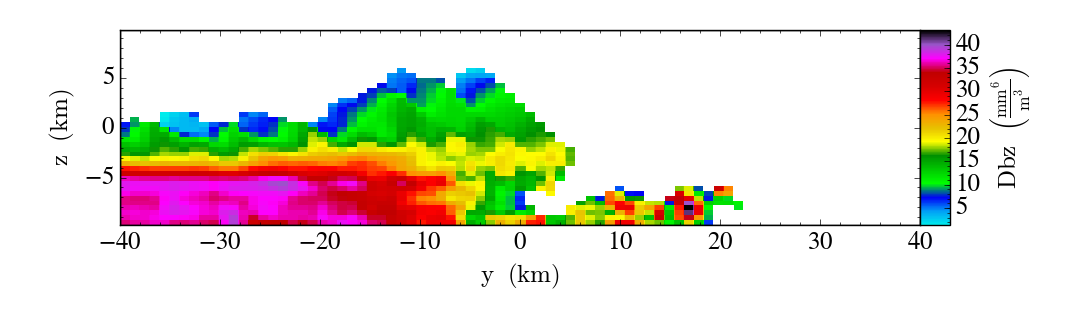

In [7]:
slc = yt.SlicePlot(ds, "x", ["dBZ"])
slc.set_cmap("dBZ", pyart.graph.cm.NWSRef)
slc.set_log("dBZ", False)
slc.annotate_grids(cmap=None)
slc.show()

/home/rjackson/anaconda3/lib/python3.5/site-packages/yt/units/yt_array.py:1093: RuntimeWarning: invalid value encountered in less
  return super(YTArray, self).__lt__(oth)
/home/rjackson/anaconda3/lib/python3.5/site-packages/yt/units/yt_array.py:1127: RuntimeWarning: invalid value encountered in greater
  return super(YTArray, self).__gt__(oth)
yt : [INFO     ] 2017-03-16 11:23:35,578 Rendering scene (Can take a while).
yt : [INFO     ] 2017-03-16 11:23:35,579 Creating volume
yt : [INFO     ] 2017-03-16 11:23:36,798 Saving render rendering.png


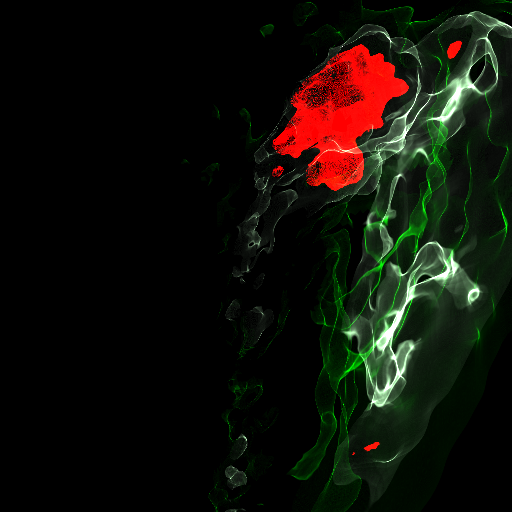

In [8]:
from yt.visualization.api import Streamlines
sc = yt.create_scene(ds, field=('stream', 'dBZ'), lens_type='perspective')

source = sc[0]
source.set_field("dBZ")
source.set_log(False)
bounds = (0, 60)
camera = sc.add_camera()

tf = yt.ColorTransferFunction(bounds)
sc.camera.width = (70000, 'm')
tf.add_layers(5, colormap=pyart.graph.cm.NWSVel)

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot('transfer_function.png', profile_field='dBZ')
#sc.annotate_domain(ds)
sc.save('rendering.png', sigma_clip=0.1)
sc.show(sigma_clip=1)

In [ ]:
sc = yt.create_scene(ds, field=('stream', 'dBZ'), lens_type='perspective')
source = sc[0]
source.set_field("w")
source.set_log(False)
bounds = (-5, 5)
camera = sc.add_camera()
camera.set_focus((0,-0.2,0.1))
camera.set_position((0000,30000,-10000))
camera.roll(-math.pi/3)

tf = yt.ColorTransferFunction(bounds)
sc.camera.width = (70000, 'm')
tf.add_layers(5, colormap=pyart.graph.cm.NWSVel)

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot('transfer_function.png', profile_field='w')

#sc.annotate_domain(ds)
sc.show(sigma_clip=1)